# 📊 MetaStockAnalysis

**MetaStockAnalysis** е проект за анализ на исторически данни за акциите на Facebook (Meta) с цел оценка на дългосрочния инвестиционен потенциал. Проектът включва анализ на исторически тенденции, технически индикатори и прогнозни модели.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [10]:
data = pd.read_csv('FB_stock_history.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


In [11]:
data.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2359,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03,2359.0,2359.0
mean,2017-01-25 14:17:02.467147008,139.606969,141.234324,137.958605,139.656876,3.095630e+07,0.0,0.0
min,2012-05-18 00:00:00,18.080000,18.270000,17.549999,17.730000,5.913100e+06,0.0,0.0
25%,2014-09-23 12:00:00,74.935001,75.565002,74.020000,74.855000,1.564190e+07,0.0,0.0
50%,2017-01-26 00:00:00,130.979996,132.259995,129.770004,131.050003,2.220590e+07,0.0,0.0
75%,2019-06-01 12:00:00,184.914993,186.830002,183.419998,185.345001,3.597605e+07,0.0,0.0
max,2021-10-01 00:00:00,381.679993,384.329987,378.809998,382.179993,5.735764e+08,0.0,0.0
std,NaN,84.490691,85.465048,83.566847,84.565640,2.778137e+07,0.0,0.0


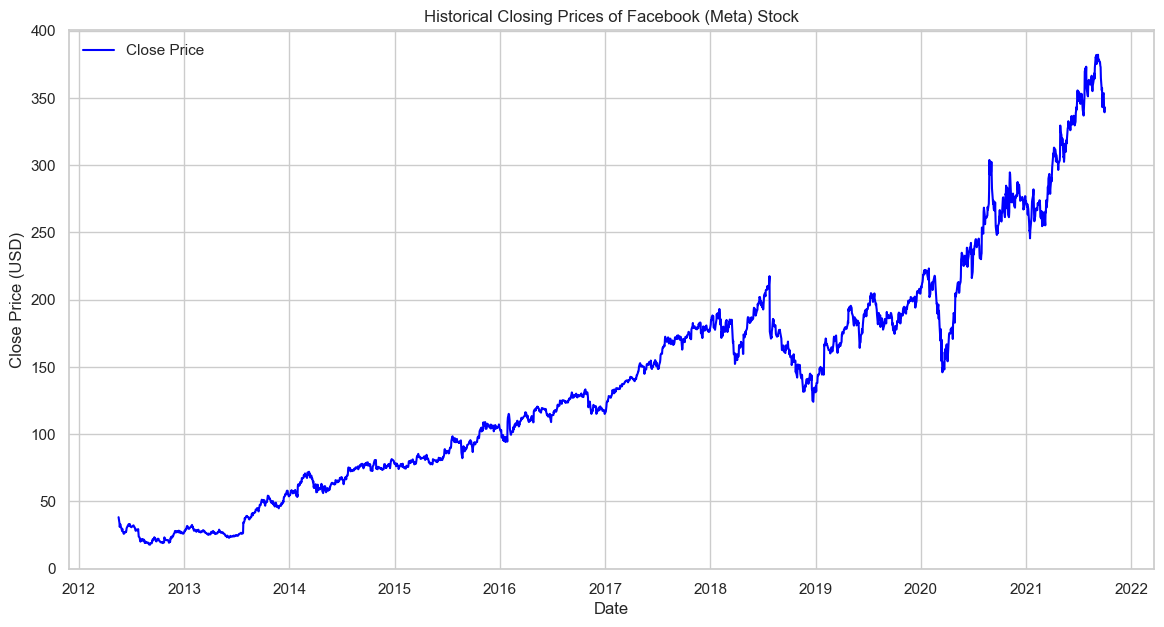

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Historical Closing Prices of Facebook (Meta) Stock')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


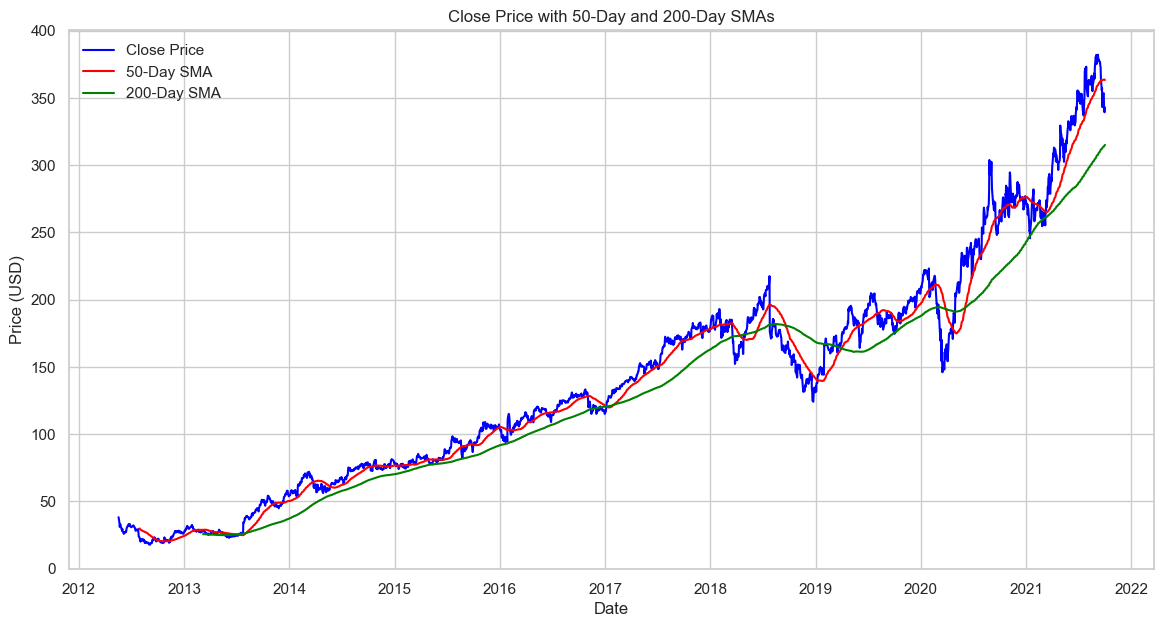

In [13]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='red')
plt.plot(data['Date'], data['SMA_200'], label='200-Day SMA', color='green')
plt.title('Close Price with 50-Day and 200-Day SMAs')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

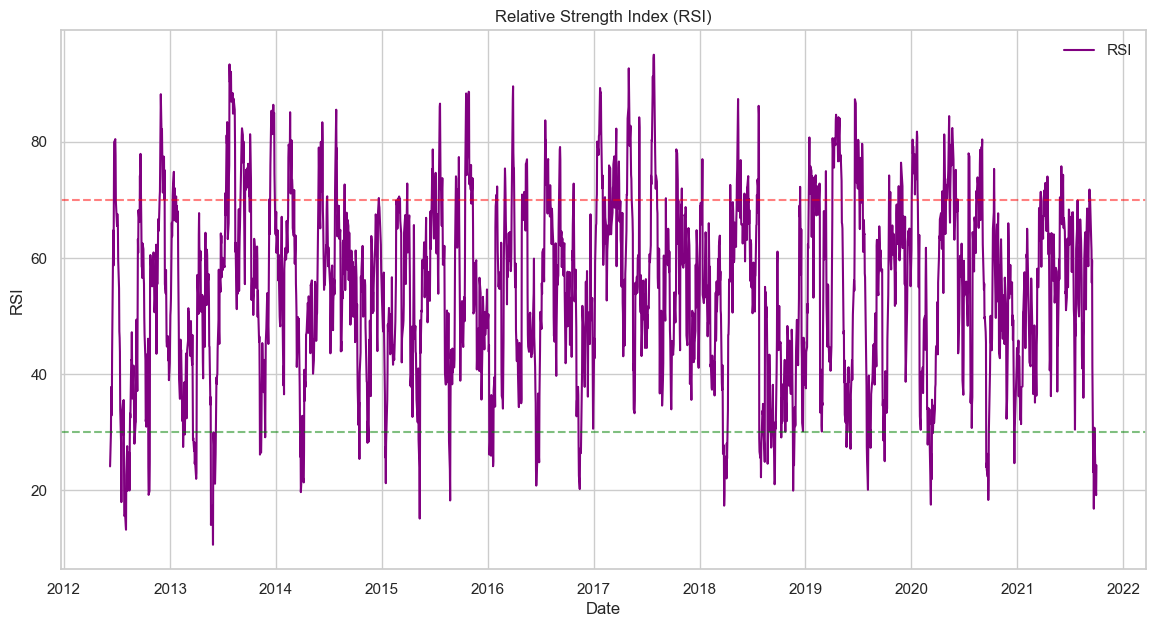

In [14]:
def compute_rsi(data, window=14):
    diff = data.diff(1).dropna()
    gain = 0.5 * (diff + abs(diff))
    loss = 0.5 * (-diff + abs(diff))
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data['Close'])

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.legend()
plt.show()


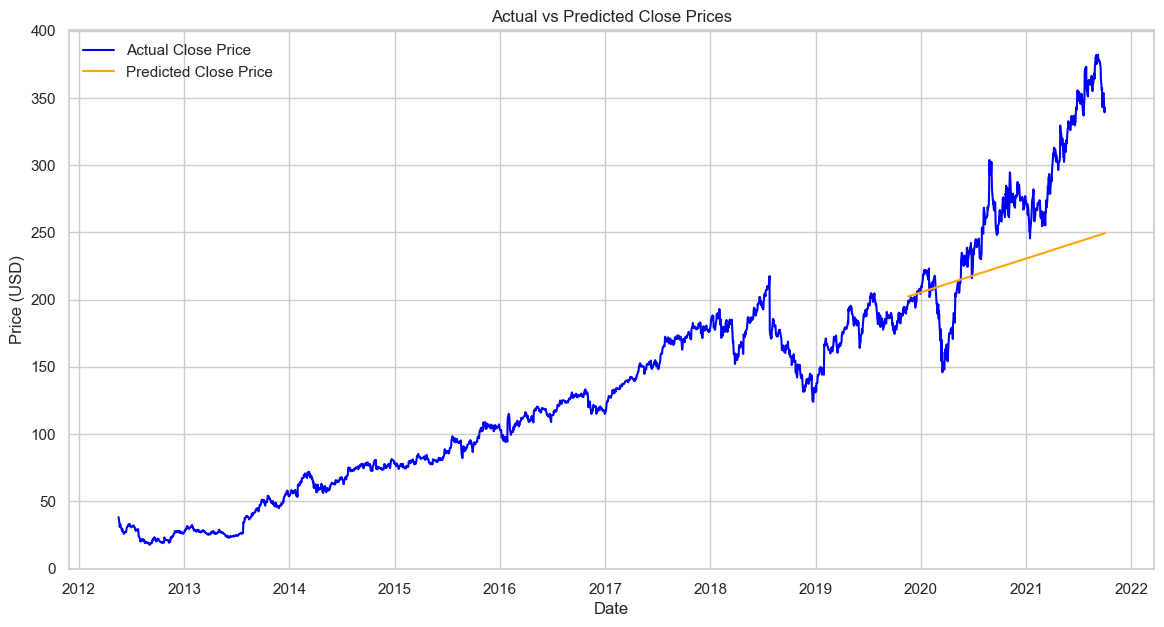

Mean Squared Error: 3586.7424293869403


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data['Date_ordinal'] = data['Date'].map(datetime.toordinal)
X = data[['Date_ordinal']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual Close Price', color='blue')
plt.plot(data['Date'][len(X_train):], y_pred, label='Predicted Close Price', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

## 📊 Заключения

Въз основа на извършения анализ, акциите на Meta показват силна възходяща тенденция с няколко периода на корекции. Техническият анализ подкрепя тезата за потенциален ръст, особено ако се поддържа настоящата макроикономическа ситуация.

### Препоръка:

Дългосрочната инвестиция в акции на Meta може да бъде обмислена, особено за инвеститори с по-висок рисков толеранс. Препоръчва се да се следят внимателно макроикономическите условия и възможните регулаторни предизвикателства.


> **Важно:** Този анализ е предназначен за образователни цели и не представлява финансов съвет. Препоръчва се да се консултирате с финансов експерт преди да вземете инвестиционни решения.
